In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import f1_score

In [3]:
torch.set_default_dtype(torch.float64)

In [4]:
train=pd.read_csv("sign_mnist_train.csv")
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
test=pd.read_csv("sign_mnist_test.csv")
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [6]:
train.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
test.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [8]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [11]:
train.label.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [12]:
class SLDataset(Dataset):
    def __init__(self, file_path):
        data = np.loadtxt(file_path, delimiter=',', skiprows=1)
        self.x = torch.tensor(data[:, 1:], dtype=torch.float32) / 255.0 
        self.y = torch.tensor(data[:, 0], dtype=torch.int64)
        self.n_samples = data.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples


In [13]:
# File paths
train_file = 'sign_mnist_train.csv'
test_file = 'sign_mnist_test.csv'

# Check if files exist
if not os.path.exists(train_file) or not os.path.exists(test_file):
    raise FileNotFoundError("Dataset files not found. Please ensure 'sign_mnist_train.csv' and 'sign_mnist_test.csv' are in the working directory.")

# Load datasets
train_dataset = SLDataset(train_file)
test_dataset = SLDataset(test_file)

# DataLoaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [14]:
# Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear3 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out) 
        
        return out


In [15]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
# Model parameters
input_size = 784  # 28x28 images
hidden_size = 784
num_classes = 25
learning_rate = 0.001
num_epochs = 32   

# Initialize model, loss, and optimizer
model = NeuralNet(input_size, hidden_size, num_classes).to(device) # Move model to device
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [17]:
# Ensure the model's parameters are in Float32
model = model.to(torch.float32)

In [18]:
# Training loop
total_steps_train = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Ensure images are in the correct dtype
        images = images.to(torch.float32)
        labels = labels.to(torch.int64)

        # Flatten images to match the input size of the model
        images = images.view(-1, 28 * 28)  # Flatten into [batch_size, 784]

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_steps_train}], Loss: {loss.item():.4f}')
    

Epoch [1/32], Step [100/429], Loss: 2.2666
Epoch [1/32], Step [200/429], Loss: 1.7242
Epoch [1/32], Step [300/429], Loss: 1.6605
Epoch [1/32], Step [400/429], Loss: 1.2948
Epoch [2/32], Step [100/429], Loss: 1.3751
Epoch [2/32], Step [200/429], Loss: 0.6110
Epoch [2/32], Step [300/429], Loss: 0.7280
Epoch [2/32], Step [400/429], Loss: 0.8781
Epoch [3/32], Step [100/429], Loss: 0.7798
Epoch [3/32], Step [200/429], Loss: 0.5022
Epoch [3/32], Step [300/429], Loss: 0.4650
Epoch [3/32], Step [400/429], Loss: 0.5164
Epoch [4/32], Step [100/429], Loss: 0.3007
Epoch [4/32], Step [200/429], Loss: 0.2821
Epoch [4/32], Step [300/429], Loss: 0.3560
Epoch [4/32], Step [400/429], Loss: 0.2049
Epoch [5/32], Step [100/429], Loss: 0.2862
Epoch [5/32], Step [200/429], Loss: 0.1190
Epoch [5/32], Step [300/429], Loss: 0.1574
Epoch [5/32], Step [400/429], Loss: 0.1145
Epoch [6/32], Step [100/429], Loss: 0.0971
Epoch [6/32], Step [200/429], Loss: 0.2017
Epoch [6/32], Step [300/429], Loss: 0.0575
Epoch [6/32

In [19]:
total_steps_test = len(test_loader)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    pred=[]
    for image, label in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(torch.int64)
        outputs = model(image)
        
        _, predicted = torch.max(outputs.data, 1)
        n_samples += label.size(0)
        n_correct += (predicted == label).sum().item()
        pred.append(predicted.data)
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')
    
# Label value of the test dataset
act_list=test["label"].tolist()
    
# To fetch the value of the pred list
pred_list=[]
for i in range(total_steps_test):
    for j in pred[i]:
        pred_list.append(j.item())
        
# To find F1 score
f1=f1_score(act_list, pred_list, average="weighted")
print(f"F1 score: {f1}")

Accuracy of the network on the 10000 test images: 82.19464584495259 %
F1 score: 0.8192339857550789


# Testing the model

In [20]:
test_label=test.iloc[:1, :1]

In [21]:
sample_label=[]
for i in range(1):
    sample_label.append(test_label.values[0][0])

In [22]:
sample_label

[6]

In [23]:
test_sample = test.iloc[:1, 1:]

In [24]:
test_sample

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107


In [25]:
sample= torch.from_numpy(test_sample.values)

In [26]:
sample=sample.to(torch.float32)

In [27]:
sample


tensor([[149., 149., 150., 150., 150., 151., 151., 150., 151., 152., 152., 152.,
         152., 152., 153., 153., 151., 152., 152., 153., 152., 152., 151., 151.,
         150., 150., 150., 149., 150., 150., 150., 152., 152., 151., 152., 152.,
         152., 152., 152., 153., 154., 153., 154., 154., 153., 154., 153., 154.,
         153., 153., 152., 152., 152., 151., 150., 151., 150., 151., 151., 152.,
         152., 152., 153., 153., 152., 152., 152., 153., 154., 154., 155., 155.,
         154., 154., 155., 155., 155., 155., 154., 153., 153., 151., 151., 152.,
         150., 151., 151., 152., 152., 152., 154., 154., 154., 154., 154., 153.,
         154., 155., 156., 157., 157., 156., 155., 156., 155., 154., 154., 155.,
         152., 154., 153., 153., 151., 152., 152., 152., 154., 154., 154., 154.,
         154., 155., 157., 156., 156., 156., 154., 150., 146., 147., 146., 147.,
         143., 137., 126., 126., 142., 139., 152., 154., 152., 153., 153., 154.,
         154., 155., 154., 1

In [28]:
prediction=model(sample)

In [29]:
prediction

tensor([[-11778.8633,  -7572.8945,   -856.1343, -10566.1562, -10058.0146,
          -1954.8785,   3163.5095,  -1519.3680,  -7525.7617,  -7894.4585,
          -8107.8950,  -6044.5171,  -4832.2544,  -4747.5049,  -1551.4354,
          -4072.6484,  -1733.0375,  -8529.1885,  -7693.5737,   -462.5956,
          -6784.9175,  -3314.4241,  -6343.2163,   -782.5171,  -8431.0771]],
       dtype=torch.float32, grad_fn=<AddmmBackward0>)

In [30]:
 _, predicted = torch.max(prediction.data, 1)

In [31]:
predicted

tensor([6])

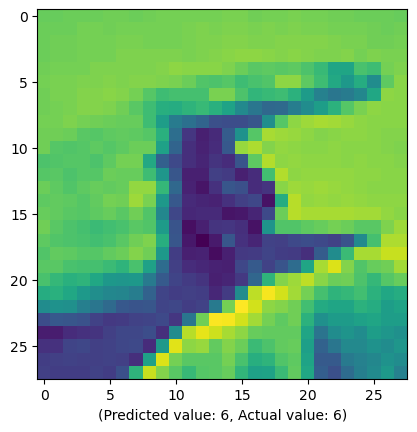

In [32]:
for i in range(1):
    plt.subplot(1, 1, i+1)
    plt.imshow(sample[i].reshape(28, 28))
    plt.xlabel(f"(Predicted value: {predicted[i]}, Actual value: {sample_label[i]})")
plt.show()